In [1]:
from keras.datasets import cifar10

In [2]:
#import libraries
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
#load cifer10 dataset and split it.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
#change train data and test data into float32 and divide by 255
#That normalizes data from 1 to 0.
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255

In [5]:
y_train.shape

(50000, 1)

In [6]:
#convert y_train and y_test into 10 categories
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test,10)

In [7]:
y_train.shape

(50000, 10)

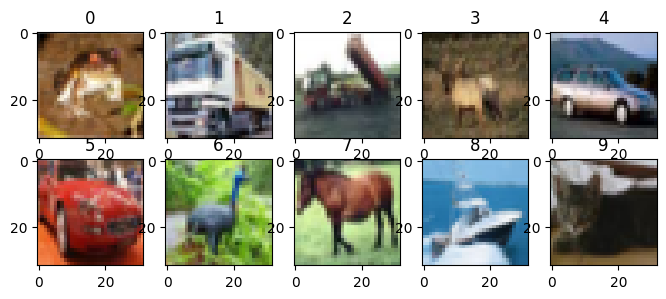

In [8]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(32,32,3))

<font color="lime"> <h1> <b> CNN

In [9]:
class CNNModel:
    def __init__(self, input_shape, optimizer, checkpoint, early_stopping):       # Constructor
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.checkpoint= checkpoint
        self.early_stopping= early_stopping
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Flatten())
        model.add(Dense(512, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer=self.optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, epochs=10, batch_size=32, validation_data=None):
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=validation_data,
                                 callbacks=[checkpoint, early_stopping])



        return self.model, history

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Example usage
input_shape = 13  # Assuming 13 features

opt= keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None )


early_stopping= keras.callbacks.EarlyStopping(
    monitor="val_loss",                               # watch validation loss
    min_delta=0,
    patience=5,                                       # patience:  number of epochs with no improvement after which training will be stopped
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

checkpoint= keras.callbacks.ModelCheckpoint(
    'CNNmodel_weights.h5',                            # a file will be saved in h5 format
    monitor="val_loss",
    verbose=0,
    save_best_only=True,                              # will save the model weights only when the val_loss  has improved from the previous best value
    save_weights_only=False,                           # only the weights of the model will be saved, rather than saving the entire model
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None,
)

In [11]:
# Create CNN model object
cnn_model = CNNModel(input_shape= input_shape, optimizer= opt,checkpoint= checkpoint, early_stopping=early_stopping)

# Compile the model
cnn_model.compile_model()

# Train the model
trained_model, history = cnn_model.train_model(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.9382 - accuracy: 0.2872 - val_loss: 1.9095 - val_accuracy: 0.3296
Epoch 2/10
  29/1563 [..............................] - ETA: 5s - loss: 1.8075 - accuracy: 0.3502

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 7s 5ms/step - loss: 1.8083 - accuracy: 0.3466 - val_loss: 1.7659 - val_accuracy: 0.3715
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7688 - accuracy: 0.3674 - val_loss: 1.7846 - val_accuracy: 0.3723
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7366 - accuracy: 0.3784 - val_loss: 1.7243 - val_accuracy: 0.3856
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7167 - accuracy: 0.3854 - val_loss: 1.7017 - val_accuracy: 0.4003
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7056 - accuracy: 0.3909 - val_loss: 1.7308 - val_accuracy: 0.3758
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6941 - accuracy: 0.3968 - val_loss: 1.7087 - val_accuracy: 0.3976
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6862 - accuracy: 0.3966 - val_loss: 1.6762 - val_accuracy: 0.4043
Epo

In [12]:

cnn_model.model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1

<font color= "lime"> <h1> <b> Loading and testing

In [13]:
file_path= '/content/CNNmodel_weights.h5'            # same as a csv file path. Copy the file path

loaded_model= keras.saving.load_model(file_path, custom_objects=None, compile=True, safe_mode=True)

In [14]:
#Let's predict whole test data!
predictions = loaded_model.predict(x_test)
results = np.argmax(predictions,axis=1)
results = pd.Series(results, name="Label")

313/313 [==============================] - 1s 2ms/step


In [15]:
results

0       8
1       1
2       8
3       0
4       4
       ..
9995    8
9996    5
9997    5
9998    5
9999    7
Name: Label, Length: 10000, dtype: int64

In [16]:
# Evaluate the model on the test data
loss, accuracy = loaded_model.evaluate(x_test, y_test)
# Test Loss: Measures prediction error (lower is better).
# Test Accuracy: Measures correct predictions (higher is better).
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 1.6629 - accuracy: 0.4049
Test Loss: 1.66292142868042
Test Accuracy: 0.4049000144004822
